<a href="https://colab.research.google.com/github/Rosangelafl/embaixadoras-dados-covid19/blob/master/dadosCovid19_06_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de dados da Covid-19 até 06 de junho de 2020, dia seguinte ao "apagão" de dados no site do Ministério da Saúde

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
file = '/content/drive/My Drive/covid.xlsx'
df = pd.read_excel(file, sep=',',parse_dates=['data'])
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN


In [33]:
df.columns.tolist()

['regiao',
 'estado',
 'municipio',
 'coduf',
 'codmun',
 'codRegiaoSaude',
 'nomeRegiaoSaude',
 'data',
 'semanaEpi',
 'populacaoTCU2019',
 'casosAcumulado',
 'casosNovos',
 'obitosAcumulado',
 'obitosNovos',
 'Recuperadosnovos',
 'emAcompanhamentoNovos']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164862 entries, 0 to 164861
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   regiao                 164862 non-null  object        
 1   estado                 164759 non-null  object        
 2   municipio              161182 non-null  object        
 3   coduf                  164862 non-null  int64         
 4   codmun                 161978 non-null  float64       
 5   codRegiaoSaude         161182 non-null  float64       
 6   nomeRegiaoSaude        161182 non-null  object        
 7   data                   164862 non-null  datetime64[ns]
 8   semanaEpi              164862 non-null  int64         
 9   populacaoTCU2019       164066 non-null  object        
 10  casosAcumulado         164862 non-null  int64         
 11  casosNovos             164862 non-null  int64         
 12  obitosAcumulado        164862 non-null  int6

In [35]:
df['data'].value_counts()

2020-06-06    4419
2020-06-05    4376
2020-06-04    4306
2020-06-03    4262
2020-06-02    4218
              ... 
2020-03-25      28
2020-03-11      28
2020-02-26      28
2020-03-16      28
2020-03-27      28
Name: data, Length: 103, dtype: int64

In [36]:
df.data.describe()

count                  164862
unique                    103
top       2020-06-06 00:00:00
freq                     4419
first     2020-02-25 00:00:00
last      2020-06-06 00:00:00
Name: data, dtype: object

In [37]:
df.isnull().sum()

regiao                        0
estado                      103
municipio                  3680
coduf                         0
codmun                     2884
codRegiaoSaude             3680
nomeRegiaoSaude            3680
data                          0
semanaEpi                     0
populacaoTCU2019            796
casosAcumulado                0
casosNovos                    0
obitosAcumulado               0
obitosNovos                   0
Recuperadosnovos         164813
emAcompanhamentoNovos    164813
dtype: int64

In [39]:
df.dropna(how='all')

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164857,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-02,23,3015268,11256,746,177,6,NaN,NaN
164858,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-03,23,3015268,12020,764,191,14,NaN,NaN
164859,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-04,23,3015268,12923,903,196,5,NaN,NaN
164860,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-05,23,3015268,14208,1285,202,6,NaN,NaN


In [40]:
df['regiao'].value_counts()

Nordeste        58867
Sudeste         48070
Sul             31074
Norte           16504
Centro-Oeste    10244
Brasil            103
Name: regiao, dtype: int64

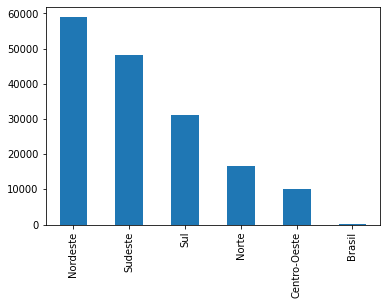

In [42]:
df['regiao'].value_counts().plot(kind='bar')

In [43]:
nordeste = df[df['regiao'] == 'Nordeste']
nordeste

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
824,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-25,9,7075181,0,0,0,0,NaN,NaN
825,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-26,9,7075181,0,0,0,0,NaN,NaN
826,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-27,9,7075181,0,0,0,0,NaN,NaN
827,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-28,9,7075181,0,0,0,0,NaN,NaN
828,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-29,9,7075181,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76602,Nordeste,BA,Xique-Xique,29,293360.0,29010.0,Irecê,2020-06-02,23,46483,21,7,0,0,NaN,NaN
76603,Nordeste,BA,Xique-Xique,29,293360.0,29010.0,Irecê,2020-06-03,23,46483,21,0,0,0,NaN,NaN
76604,Nordeste,BA,Xique-Xique,29,293360.0,29010.0,Irecê,2020-06-04,23,46483,21,0,0,0,NaN,NaN
76605,Nordeste,BA,Xique-Xique,29,293360.0,29010.0,Irecê,2020-06-05,23,46483,25,4,0,0,NaN,NaN


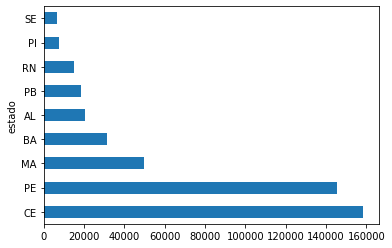

In [45]:
nordeste.groupby('estado')['obitosAcumulado'].sum().sort_values(ascending=False).plot(kind='barh')

In [46]:
temp = nordeste.groupby(['data', 'semanaEpi'])['obitosAcumulado', 'obitosNovos'].sum().reset_index()


In [47]:
temp = temp.melt(id_vars='data', value_vars=['obitosAcumulado', 'obitosNovos'], 
                 var_name='Case', value_name='Count')

In [48]:
temp.head()

,data,Case,Count
0,2020-02-25,obitosAcumulado,0
1,2020-02-26,obitosAcumulado,0
2,2020-02-27,obitosAcumulado,0
3,2020-02-28,obitosAcumulado,0
4,2020-02-29,obitosAcumulado,0


In [49]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [50]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [51]:
acumulados = '#21bf73'
mortes = '#ff2e63'

In [52]:
import plotly.express as px
fig = px.area(temp, 
              x='data', 
              y="Count", 
              color='Case', 
              height= 700,
              title='Curva de mortes por Covid 19 na região Nordeste',
              color_discrete_sequence = [acumulados, mortes])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [53]:
temp2 = nordeste.groupby(['data', 'semanaEpi'])['casosAcumulado', 'casosNovos'].sum().reset_index()


In [54]:
temp2 = temp2.melt(id_vars='data', value_vars=['casosAcumulado', 'casosNovos'], 
                 var_name='Case', value_name='Count')
temp2.head()

,data,Case,Count
0,2020-02-25,casosAcumulado,0
1,2020-02-26,casosAcumulado,0
2,2020-02-27,casosAcumulado,0
3,2020-02-28,casosAcumulado,0
4,2020-02-29,casosAcumulado,0


In [56]:
import plotly.express as px
fig = px.area(temp2, 
              x='data', 
              y="Count", 
              color='Case', 
              height= 700,
              title='Curva por semana epidemiológica na região Nordeste',
              color_discrete_sequence = [acumulados, mortes])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [57]:
temp_br = df.groupby(['data', 'semanaEpi'])['obitosAcumulado', 'obitosNovos'].sum().reset_index()

In [58]:
temp_br = temp_br.melt(id_vars='data', value_vars=['obitosAcumulado', 'obitosNovos'], 
                 var_name='Case', value_name='Count')
temp2.head()

,data,Case,Count
0,2020-02-25,casosAcumulado,0
1,2020-02-26,casosAcumulado,0
2,2020-02-27,casosAcumulado,0
3,2020-02-28,casosAcumulado,0
4,2020-02-29,casosAcumulado,0


In [59]:
import plotly.express as px
fig = px.area(temp_br, 
              x='data', 
              y="Count", 
              color='Case', 
              height= 700,
              title='Mortes por Covid 19, Brasil até 6 de junho',
              color_discrete_sequence = [acumulados, mortes])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()